In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [7]:
# get cvx data
payload = {
    'key': 'C2EJhfoPuo4xonK4vrTtmBPsB8I42oah',  # Required
    'freq': 'day',                              # Required
    'start': '2020-01-01',                      # Optional
    'format': 'records'                         # Optional
}

response = requests.get('https://thecvx.com/api/data', params=payload)
cvx = response.json()
cvx

{'result': [{'timestamp': '2020-02-08', 'CVX': 50.737, 'CVX76': 55.3758},
  {'timestamp': '2020-02-09', 'CVX': 51.1455, 'CVX76': 54.6623},
  {'timestamp': '2020-02-10', 'CVX': 50.8799, 'CVX76': 55.5654},
  {'timestamp': '2020-02-11', 'CVX': 49.7181, 'CVX76': 54.4095},
  {'timestamp': '2020-02-12', 'CVX': 53.801, 'CVX76': 59.9958},
  {'timestamp': '2020-02-13', 'CVX': 54.635, 'CVX76': 60.3607},
  {'timestamp': '2020-02-14', 'CVX': 54.214, 'CVX76': 57.6816},
  {'timestamp': '2020-02-15', 'CVX': 54.2611, 'CVX76': 56.334},
  {'timestamp': '2020-02-16', 'CVX': 57.1296, 'CVX76': 58.2516},
  {'timestamp': '2020-02-17', 'CVX': 55.0179, 'CVX76': 56.8295},
  {'timestamp': '2020-02-18', 'CVX': 53.8231, 'CVX76': 55.9857},
  {'timestamp': '2020-02-19', 'CVX': 62.4533, 'CVX76': 59.8513},
  {'timestamp': '2020-02-20', 'CVX': 57.2844, 'CVX76': 62.8218},
  {'timestamp': '2020-02-21', 'CVX': 52.843, 'CVX76': 53.8143},
  {'timestamp': '2020-02-22', 'CVX': 50.8711, 'CVX76': 49.7795},
  {'timestamp': '2020

In [8]:
# load cvx dataframe
cvx_df = pd.DataFrame(cvx['result'])
cvx_df['timestamp'] = pd.to_datetime(cvx_df['timestamp'])
cvx_df.rename(columns={'timestamp': 'Date'}, inplace=True)
cvx_df.set_index('Date', inplace=True)
cvx_df

,CVX,CVX76
Date,,
2020-02-08,50.7370,55.3758
2020-02-09,51.1455,54.6623
2020-02-10,50.8799,55.5654
2020-02-11,49.7181,54.4095
2020-02-12,53.8010,59.9958
...,...,...
2025-04-17,41.5704,42.9043
2025-04-18,40.1512,38.7033
2025-04-19,39.5018,40.2664


In [9]:
# deannualize cvx data
cvx_df = cvx_df / np.sqrt(365)
cvx_df

,CVX,CVX76
Date,,
2020-02-08,2.655696,2.898502
2020-02-09,2.677078,2.861156
2020-02-10,2.663176,2.908426
2020-02-11,2.602364,2.847923
2020-02-12,2.816073,3.140324
...,...,...
2025-04-17,2.175894,2.245714
2025-04-18,2.101610,2.025823
2025-04-19,2.067619,2.107640


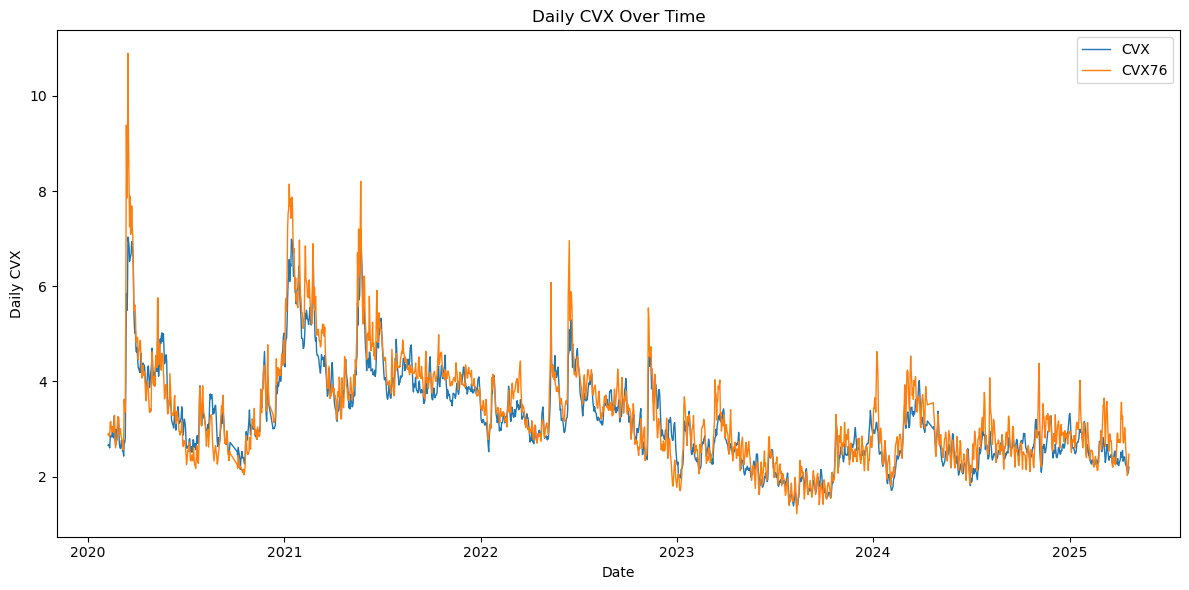

In [10]:
# plot cvx data
plt.figure(figsize=(12, 6))
plt.plot(cvx_df.index, cvx_df['CVX'], label='CVX', linewidth=1)
plt.plot(cvx_df.index, cvx_df['CVX76'], label='CVX76', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Daily CVX')
plt.title('Daily CVX Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# get rolling mean of cvx
cvx_df['CVX_MA7'] = cvx_df['CVX'].rolling(window=7).mean()
cvx_df['CVX_MA30'] = cvx_df['CVX'].rolling(window=30).mean()
cvx_df.dropna(inplace=True)

In [12]:
# save cxv data
cvx_df.to_csv('../data/daily_cvx.csv')

In [32]:
# load realized vars
realized_vars = pd.read_csv('../data/daily_realized_vars.csv', index_col=0, parse_dates=True)
realized_vars

,BTC,ETH,LTC,XRP
Date,,,,
2018-05-26,9.507324,20.803025,17.580242,22.039581
2018-05-27,9.415370,20.214933,16.203072,21.953389
2018-05-28,9.724585,25.268805,17.233963,25.752617
2018-05-29,10.215433,27.540679,18.361352,28.446418
2018-05-30,10.033580,27.541524,17.905834,28.205759
...,...,...,...,...
2025-03-12,16.308820,35.093161,31.490108,80.532975
2025-03-13,16.688697,35.264892,31.680333,78.743803
2025-03-14,17.029824,35.544114,32.056697,79.658963


In [48]:
# align dates 
common_idx = cvx_df.index.intersection(realized_vars.index)
cvx_df = cvx_df.loc[common_idx]
realized_vars = realized_vars.loc[common_idx]
realized_vols = np.sqrt(realized_vars)

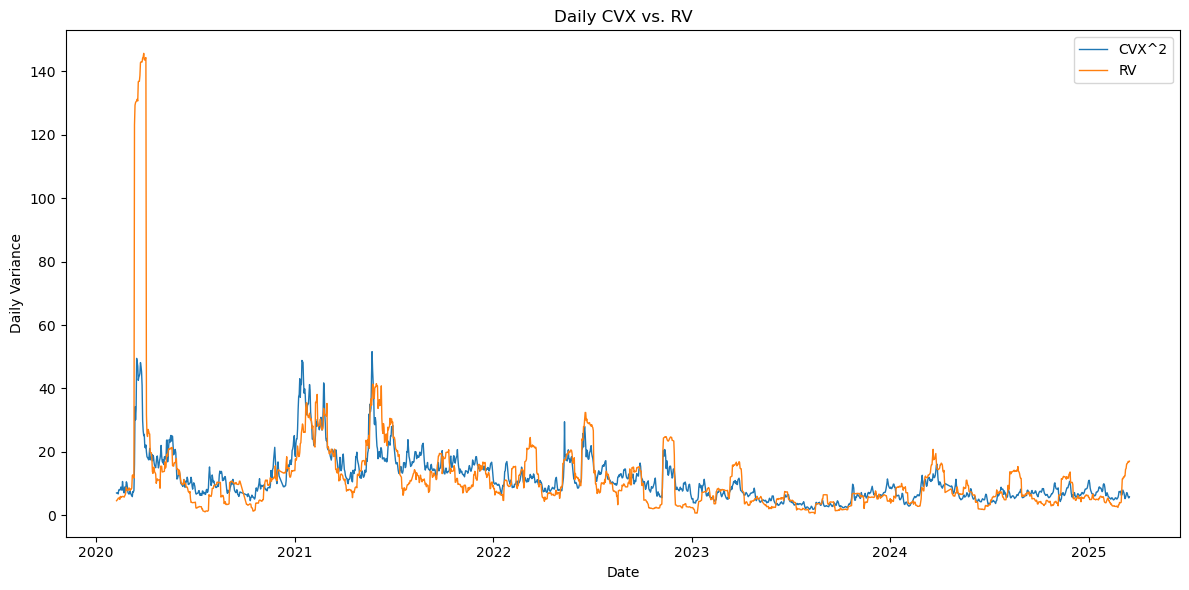

In [ ]:
# plot cvx^2 vs realized vars
plt.figure(figsize=(10, 6))
plt.plot(cvx_df.index, cvx_df['CVX']**2, label='CVX^2', linewidth=1)
plt.plot(realized_vols.index, realized_vars['BTC'], label='Realized', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Daily CVX vs. RV')
plt.legend()
plt.tight_layout()
plt.show()